# Instacart Datasets
## An exploration in the shopping habits of online customers

Instacart is an online grocery store, allowing users to purchase items for delivery.  This review aims to clean up the data received from Instacart and identify the top items and the most popular buying times.

Attention will also be given how many items do people typically buy in one order and what the top 20 items that are reordered most frequently.

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Open files and study format

In [17]:
orders = pd.read_csv('datasets/instacart_orders.csv', sep=';')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


Intial reading of 'instacart_orders.csv' (calling info()) showed that the columns were separated by a semi-colon.  The necessary attribute sep=';' was added when the csv file was opened to clean up the columns.  The dataframe has 478967 rows with one column (days_since_prior_order) having 28,819 missing values.  This is possibly the user's first order (no prior order).  All datatypes are numbers (days in float).

In [18]:
products = pd.read_csv('datasets/products.csv', sep=';')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


The products dataset also had ';' as a separator.  There are 49694 products listed and only 48436 product names (missing information or duplicate rows).  All number datatypes are int64 and the names are strings.

In [19]:
op = pd.read_csv('datasets/order_products.csv', sep=';')
op.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


Order_products has one row for every product ordered, giving forth to over 4 million rows.  Intial reading of the file failed to give a number of non-null values due to the large size so we included the show_counts=True attribute when calling .info() to see the nubmer of non-null values.  We see now that the add_to_cart_order coulumn contains a small percentage of null values.  The separator is set as ';'.

In [20]:
aisles = pd.read_csv('datasets/aisles.csv', sep=';')
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


The aisles dataframe was corrected for the semicolon separator.  There are 134 rows with correct datatypes corresponding to aisle numbers and names.

In [21]:
dp = pd.read_csv('datasets/departments.csv', sep=';')
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


The departments dataframe (dp) represents 21 departments and names.  Further investivation is needed to verify unique and missing values.

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [22]:
# Check for duplicated orders
print(orders.duplicated().sum())

15


In [23]:
orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [24]:
orders[orders['order_id']==2125197]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
204042,2125197,14050,48,3,2,3.0
441599,2125197,14050,48,3,2,3.0


In [25]:
orders[orders['order_id']==467134]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
250626,467134,63189,21,3,2,2.0
394347,467134,63189,21,3,2,2.0


In [26]:
# Check for all orders placed Wednesday at 2:00 AM
orders[(orders['order_dow']==3) & (orders['order_hour_of_day']==2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [27]:
# Remove duplicate orders
orders = orders.drop_duplicates().reset_index(drop=True)

In [28]:
# Double check for duplicate rows
orders.duplicated().sum()

0

15 duplicate rows are detected in the orders dataframe.  Testing a couple of the order id's (found when printing out the duplicates above) shows that these are probably all genuine duplicates.  Additionally, the decision to drop all duplicates before checking them all is supported by them being such a small part of the dataframe.  Duplicates were dropped using drop_duplicates() and the index was reset.  Checking the dataframe afterwards shows no more duplicated.

In [29]:
# Double check for duplicate order IDs only
duplicate_order_id = orders.duplicated(subset=['order_id'])
print(duplicate_order_id.sum())

0


### `products` data frame

In [30]:
# Check for fully duplicate rows
products.duplicated().sum()

0

In [31]:
# Check for just duplicate product IDs
products.duplicated(subset=['product_id']).sum()

0

In [32]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products.duplicated(subset=['product_name']).sum()

1257

In [33]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name_lower'] = products['product_name'].str.lower()
products.duplicated(subset=['product_name_lower']).sum()

1361

When checking for duplicate product names, 1257 were recognized as duplicates.  However when changing all the names to lowercase, 1361 cases were identified.

In [34]:
products['product_name_lower'].isna().sum()

1258

In [35]:
# Check for duplicate product names that aren't missing

In [36]:
products['product_name_lower'].value_counts(dropna=False)

NaN                                                                     1258
green tea with ginseng and honey                                           3
carrot and celery sticks                                                   2
apricot energy bar                                                         2
proactive health indoor weight & hairball care with chicken cat food       2
                                                                        ... 
all natural chicken apple sausage                                          1
quartered artichoke hearts                                                 1
big eye ipa                                                                1
unstopables lush                                                           1
fresh foaming cleanser                                                     1
Name: product_name_lower, Length: 48333, dtype: int64

In [37]:
print(products['product_name_lower'].value_counts()[products['product_name_lower'].value_counts() > 1])

green tea with ginseng and honey                                        3
carrot and celery sticks                                                2
apricot energy bar                                                      2
top the tater chive & onion sour cream                                  2
proactive health indoor weight & hairball care with chicken cat food    2
                                                                       ..
cauliflower head                                                        2
half and half                                                           2
original bbq sauce                                                      2
spreadable butter with canola oil                                       2
mandarin oranges in light syrup                                         2
Name: product_name_lower, Length: 103, dtype: int64


Using .value_counts() method, we see that the duplicates consist of 103 unique product names.  This is not including the 1258 values that are NaN.

In [38]:
print(products[products['product_name_lower'].isna()])

       product_id product_name  aisle_id  department_id product_name_lower
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]


In [39]:
dept_21 = products[products['department_id']==21]
print(dept_21)

       product_id product_name  aisle_id  department_id product_name_lower
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]


In [40]:
op[op['product_id'].isin(dept_21)]

,order_id,product_id,add_to_cart_order,reordered


Looking at all the data that has missing values, all 1258 instances are all come from department_id= 21.  In fact, all of department 21 is unnamed and seems to be a missing department.  Furthermore, there is no history orders from this department (see order_products empty dataframe for dept_ above), prompting our decision to remove these null rows along with the duplicate rows.

In [41]:
products = products.dropna()

In [42]:
products['product_name_lower'].duplicated().sum()

104

In [43]:
type(products)

pandas.core.frame.DataFrame

In [44]:
products = products.drop_duplicates(subset=['product_name_lower']).reset_index(drop=True)

In [45]:
products['product_name_lower'].duplicated().sum()

0

In [46]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48332 entries, 0 to 48331
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product_id          48332 non-null  int64 
 1   product_name        48332 non-null  object
 2   aisle_id            48332 non-null  int64 
 3   department_id       48332 non-null  int64 
 4   product_name_lower  48332 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.8+ MB


Dropping the null values and the duplicates in the products dataset got rid of 1361 values

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Right</div>

### `departments` data frame

In [47]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [48]:
print(dp[dp['department_id']==21])

    department_id department
20             21    missing


In [49]:
print(dp)

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing


In [50]:
#drop department number 21
dp = dp[dp['department_id']!=21]

In [51]:
print(dp)

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli


Index 20 corresponding to department 21 was deleted but this was a null department full of missing products that were never ordered.

### `aisles` data frame

In [52]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [53]:
aisles.duplicated().sum()

0

In [54]:
aisles.isna().sum()

aisle_id    0
aisle       0
dtype: int64

In [55]:
print(aisles[aisles['aisle_id']==100])

    aisle_id    aisle
99       100  missing


In [56]:
aisles = aisles[aisles['aisle_id']==100]

As expected aisle_id 100 is corresponding to missing, a fake aisle.  This aisle is dropped from the dataset.

### `order_products` data frame

In [57]:
# Check for fullly duplicate rows
op.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [58]:
op.duplicated().sum()

0

In [59]:
op.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1


In [60]:
# Double check for any other tricky duplicates
op.duplicated(subset=['order_id', 'product_id']).sum()

0

## Find and remove missing values


### `products` data frame

All the missing products info was removed above.  I decided to remove all of those products with unknown names after discovering that they were all in department_id 21 and aisle_id 100.

### `orders` data frame

In [61]:
orders.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


In [62]:
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [63]:
# Are there any missing values where it's not a customer's first order?
orders[orders['days_since_prior_order']>0].isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

All the missing values in the orders dataframe occur in the days_since_prior_order column.  These missing values represent a customer's first order (no last order).

### `order_products` data frame

In [64]:
op.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [65]:
# What are the min and max values in this column?
min_op = op['add_to_cart_order'].min()
print(min_op)

1.0


In [66]:
max_op = op['add_to_cart_order'].max()
print(max_op)

64.0


In [67]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
op['add_to_cart_order'].isna().sum()

836

In [68]:
missing_cart = op[op['add_to_cart_order'].isna()]
print(missing_cart)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [69]:
missing_cart_ids = missing_cart['order_id']
print(missing_cart_ids.nunique())

70


In [70]:
# Do all orders with missing values have more than 64 products?
print(op.query("(order_id in @missing_cart_ids) and (add_to_cart_order > 63)"))

         order_id  product_id  add_to_cart_order  reordered
76044     1386261       31847               64.0          0
154176     854647       22922               64.0          0
177733    3383594        7970               64.0          0
213282    2470674       30257               64.0          0
233518    1968313         495               64.0          1
...           ...         ...                ...        ...
4148751   2999801       24722               64.0          1
4235552   3308010        3888               64.0          1
4409436    747668       31268               64.0          0
4419785   1633337          34               64.0          0
4432234      9310       21332               64.0          0

[70 rows x 4 columns]


All 70 unique missing value ids have 64 items in their cart.  It is possible that all the missing values occur when the online shopping cart is 'full'.  All missing values are replaced to 999 and assigned to integers below.

In [71]:
# Replace missing values with 999 and convert column to integer type
op['add_to_cart_order'] = op['add_to_cart_order'].fillna(999).astype('int')

In [72]:
op.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [73]:
orders['order_dow'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

In [74]:
orders['order_hour_of_day'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [75]:
order_day_min = orders['order_dow'].min()
order_day_max = orders['order_dow'].max()
print('Day range:', order_day_min, '-', order_day_max)


Day range: 0 - 6


In [76]:
order_hour_min = orders['order_hour_of_day'].min()
order_hour_max = orders['order_hour_of_day'].max()
print('Hour of day range:', order_hour_min, '-', order_hour_max)

Hour of day range: 0 - 23


In the orders dataframe the day range (orders['order_dow']) is 0-6 (Monday-Sunday) and the hour of day range (orders['order_hour_of_day']) is 0-23 corresponding to 12 am to 11 pm. This was accomplished by use of unique() function and the min and max functions.

### [A2] What time of day do people shop for groceries?

In [77]:
orders['order_hour_of_day'].value_counts()

10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2       989
3       770
4       765
Name: order_hour_of_day, dtype: int64

In [78]:
orders['order_hour_of_day'].describe()

count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64

Although people shop at all hours of the day and night, online shopping mainly occurs during the day between the hours of 9:00-17:00 with the most shopping occuring between 10 and 12 (the 10th and 11th hours).

<AxesSubplot:title={'center':'Orders during the day'}, xlabel='Hour of Day', ylabel='Orders'>

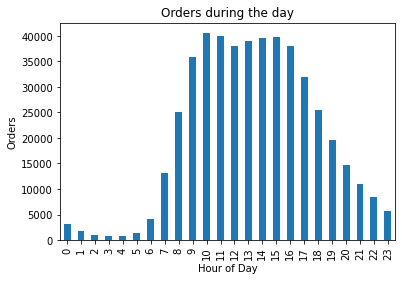

In [79]:
orders['order_hour_of_day'].value_counts().sort_index().plot(kind = "bar", title='Orders during the day', xlabel='Hour of Day', ylabel='Orders')

### [A3] What day of the week do people shop for groceries?

In [80]:
orders['order_dow'].value_counts()

0    84090
1    82185
2    65833
5    63488
6    62649
3    60897
4    59810
Name: order_dow, dtype: int64

People shop everyday but most people show for groceries on Monday and Tuesday and least on Friday.

### [A4] How long do people wait until placing another order?

In [81]:
orders['days_since_prior_order'].value_counts()

30.0    51337
7.0     44577
6.0     33930
4.0     31006
3.0     30224
5.0     30096
2.0     27138
8.0     25361
1.0     20179
9.0     16753
14.0    13992
10.0    13309
13.0    11737
11.0    11467
12.0    10658
0.0      9589
15.0     9416
16.0     6587
21.0     6448
17.0     5498
20.0     5302
18.0     4971
19.0     4939
22.0     4514
28.0     3745
23.0     3337
24.0     3015
27.0     2986
25.0     2711
29.0     2673
26.0     2640
Name: days_since_prior_order, dtype: int64

In [82]:
orders['days_since_prior_order'].describe()

count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64

<AxesSubplot:title={'center':'Days Since Last Order'}, xlabel='Days Since Last Order', ylabel='count'>

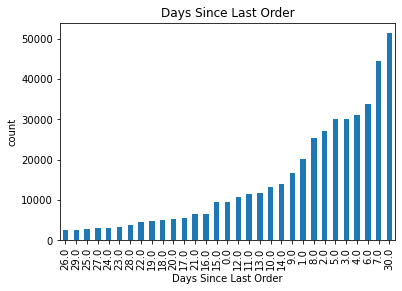

In [83]:
orders['days_since_prior_order'].value_counts().sort_values().plot(kind='bar', title='Days Since Last Order', xlabel='Days Since Last Order', ylabel='count')

Most people wait a full 30 days before placing another order but the average person waits 11 days.



# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

<function matplotlib.pyplot.show(close=None, block=None)>

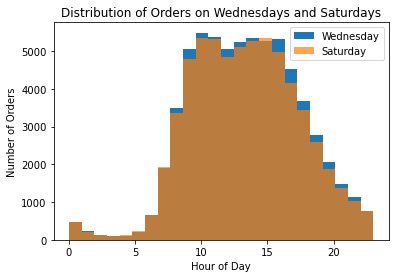

In [84]:
orders[orders['order_dow']==2]['order_hour_of_day'].plot(kind='hist', bins=24)
orders[orders['order_dow']==5]['order_hour_of_day'].plot(kind='hist', bins=24, alpha=0.7)
plt.legend(['Wednesday', 'Saturday'])
plt.title('Distribution of Orders on Wednesdays and Saturdays')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show

The distribution of orders on Wednesdays and Saturdays are very similar.  Both occuring curing the same hours of the day (largely between 9 am and 5pm.  Orders on Wednesday slightly exceeded those on Saturday.

### [B2] What's the distribution for the number of orders per customer?

In [85]:
max_orders = orders.groupby('user_id')['order_number'].max().reset_index()
print(max_orders)

        user_id  order_number
0             2             4
1             4             6
2             5             4
3             6             4
4             7            19
...         ...           ...
157432   206203             2
157433   206206            66
157434   206207            14
157435   206208            34
157436   206209            13

[157437 rows x 2 columns]


In [86]:
most_common_maximum_orders = max_orders['order_number'].value_counts()
print(most_common_maximum_orders)

4     12368
3     10510
5     10406
6      9194
2      9113
      ...  
81       89
84       87
80       86
89       85
87       76
Name: order_number, Length: 100, dtype: int64


In [87]:
max_orders.describe()

,user_id,order_number
count,157437.000000,157437.000000
mean,103173.817953,15.577571
std,59547.633913,17.215517
min,2.000000,1.000000
25%,51634.000000,4.000000
50%,103120.000000,9.000000
75%,154768.000000,20.000000
max,206209.000000,100.000000


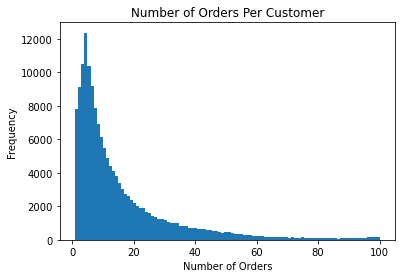

In [88]:
max_orders.plot(kind='hist', title='Number of Orders Per Customer', legend=False, x='user_id', y='order_number', xlabel='Number of Orders', bins=100)
plt.xlabel('Number of Orders')
plt.show()

75% of customers ordered less than 20 times.  The most common times a customer would order was 4 orders and the average order number for all the customers was 15 orders.  The maximum order number recorded was 100 orders.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Right</div>

### [B3] What are the top 20 popular products (display their id and name)?

In [89]:
popular_products = op['product_id'].value_counts()

In [90]:
popular_products=popular_products.reset_index()
popular_products.columns=['product_id','total_orders'] 

In [91]:
popular_products.iloc[0:20]

,product_id,total_orders
0,24852,66050
1,13176,53297
2,21137,37039
3,21903,33971
4,47209,29773
5,47766,24689
6,47626,21495
7,16797,20018
8,26209,19690
9,27845,19600


In [92]:
pop_merge = popular_products.merge(products[['product_id','product_name']],how='left',on=['product_id'])

In [93]:
pop_merge.index +=1

In [94]:
pop_merge[0:20]

,product_id,total_orders,product_name
1,24852,66050,Banana
2,13176,53297,Bag of Organic Bananas
3,21137,37039,Organic Strawberries
4,21903,33971,Organic Baby Spinach
5,47209,29773,Organic Hass Avocado
6,47766,24689,Organic Avocado
7,47626,21495,Large Lemon
8,16797,20018,Strawberries
9,26209,19690,Limes
10,27845,19600,Organic Whole Milk


These are the 20 most popular products above.  75% of them are labeled as organic!

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Perfect</div>

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [95]:
products_each_order = op.groupby('order_id').count()
print(products_each_order)

          product_id  add_to_cart_order  reordered
order_id                                          
4                 13                 13         13
9                 15                 15         15
11                 5                  5          5
19                 3                  3          3
20                 8                  8          8
...              ...                ...        ...
3421034           17                 17         17
3421053            9                  9          9
3421071            5                  5          5
3421077            4                  4          4
3421079            1                  1          1

[450046 rows x 3 columns]


In [96]:
products_each_order.describe()

,product_id,add_to_cart_order,reordered
count,450046.000000,450046.000000,450046.000000
mean,10.098983,10.098983,10.098983
std,7.540206,7.540206,7.540206
min,1.000000,1.000000,1.000000
25%,5.000000,5.000000,5.000000
50%,8.000000,8.000000,8.000000
75%,14.000000,14.000000,14.000000
max,127.000000,127.000000,127.000000


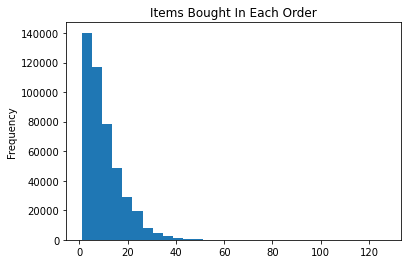

In [97]:
products_each_order['product_id'].plot(kind='hist', title='Items Bought In Each Order', bins=30)
plt.show()

<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Please use plt.show() instead of plt.show


</div>

A customer buys around 10 products on average per order.  The minimum order is 1 item and the maximum order is 127 items.  75% of customers buy 14 items or less.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Right</div>

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [98]:
was_reordered = op[op['reordered']==1]
was_reordered

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1
...,...,...,...,...
4544999,1622300,24852,1,1
4545000,1125324,40600,6,1
4545002,577211,15290,12,1
4545004,692640,47766,4,1


In [99]:
top_reordered = was_reordered['product_id'].value_counts().reset_index()

In [100]:
top_reordered.columns=['product_id', 'count']

In [101]:
top_reordered_merge = top_reordered.merge(products[['product_id', 'product_name']], how='left', on=['product_id'])

In [102]:
top_reordered_merge.index +=1

In [103]:
top_reordered_merge[0:20]

,product_id,count,product_name
1,24852,55763,Banana
2,13176,44450,Bag of Organic Bananas
3,21137,28639,Organic Strawberries
4,21903,26233,Organic Baby Spinach
5,47209,23629,Organic Hass Avocado
6,47766,18743,Organic Avocado
7,27845,16251,Organic Whole Milk
8,47626,15044,Large Lemon
9,27966,14748,Organic Raspberries
10,16797,13945,Strawberries


In [104]:
top_reordered_merge[0:20]['product_id'].isin(pop_merge[0:20]['product_id']).sum()

19

The above data frame shows the top 20 products that are reordered again and again.  19 our of 20 of them are also in the top 20 for most popular products.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Super</div>

### [C3] For each product, what proportion of its orders are reorders?

In [105]:
popular_products

,product_id,total_orders
0,24852,66050
1,13176,53297
2,21137,37039
3,21903,33971
4,47209,29773
...,...,...
45568,47987,1
45569,26408,1
45570,24435,1
45571,36946,1


In [106]:
was_reordered = op[op['reordered']==1]['product_id']
count_reordered = was_reordered.value_counts()
count_reordered = count_reordered.reset_index()
count_reordered.columns = ['product_id', 'count_reordered']

In [107]:
count_reordered

,product_id,count_reordered
0,24852,55763
1,13176,44450
2,21137,28639
3,21903,26233
4,47209,23629
...,...,...
36223,40133,1
36224,12061,1
36225,45095,1
36226,46185,1


In [108]:
count_merge = popular_products.merge(count_reordered, how='left', on=['product_id'])
count_merge = count_merge.fillna(0)

In [109]:
count_merge

,product_id,total_orders,count_reordered
0,24852,66050,55763.0
1,13176,53297,44450.0
2,21137,37039,28639.0
3,21903,33971,26233.0
4,47209,29773,23629.0
...,...,...,...
45568,47987,1,0.0
45569,26408,1,0.0
45570,24435,1,0.0
45571,36946,1,1.0


In [110]:
count_merge['proportion_reordered'] = (count_merge['count_reordered']/count_merge['total_orders'])

In [111]:
count_merge['proportion_reordered'] = count_merge['proportion_reordered'].map('{:.2%}'.format)

In [112]:
count_merge = count_merge.merge(products[['product_name', 'product_id']], how='left', on=['product_id'])

In [113]:
count_merge

,product_id,total_orders,count_reordered,proportion_reordered,product_name
0,24852,66050,55763.0,84.43%,Banana
1,13176,53297,44450.0,83.40%,Bag of Organic Bananas
2,21137,37039,28639.0,77.32%,Organic Strawberries
3,21903,33971,26233.0,77.22%,Organic Baby Spinach
4,47209,29773,23629.0,79.36%,Organic Hass Avocado
...,...,...,...,...,...
45568,47987,1,0.0,0.00%,Anti-Itch Lotion
45569,26408,1,0.0,0.00%,Melatonin- 2.5 mg Liquid
45570,24435,1,0.0,0.00%,Clarifying Toner
45571,36946,1,1.0,100.00%,Uncured Canadian Bacon


The proportion_reordered column in the above dataframe shows the percentage of each product's orders that were reorders.